In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24028 entries, 0 to 24027
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          24028 non-null  int64  
 1   LIMIT_BAL                   23315 non-null  float64
 2   JOB_TYPE                    23348 non-null  float64
 3   WORK_YEARS                  3604 non-null   float64
 4   SEX                         23339 non-null  object 
 5   EDUCATION                   23374 non-null  object 
 6   MARRIAGE                    23314 non-null  object 
 7   AGE                         23331 non-null  float64
 8   PAY_0                       23322 non-null  float64
 9   PAY_2                       23327 non-null  float64
 10  PAY_3                       23350 non-null  float64
 11  PAY_4                       23328 non-null  float64
 12  PAY_5                       23321 non-null  float64
 13  PAY_6                       233

### Dealing With Missing Values
***
***

In [4]:
#calculating the number of missing values in each of the columns
df.isna().sum()

ID                                0
LIMIT_BAL                       713
JOB_TYPE                        680
WORK_YEARS                    20424
SEX                             689
EDUCATION                       654
MARRIAGE                        714
AGE                             697
PAY_0                           706
PAY_2                           701
PAY_3                           678
PAY_4                           700
PAY_5                           707
PAY_6                           692
BILL_AMT1                       687
BILL_AMT2                       707
BILL_AMT3                       684
BILL_AMT4                       659
BILL_AMT5                       685
BILL_AMT6                       664
PAY_AMT1                        691
PAY_AMT2                        736
PAY_AMT3                        652
PAY_AMT4                        689
PAY_AMT5                        712
PAY_AMT6                        684
default payment next month        0
dtype: int64

## Dealing with Misising Values in Categorical Features
***

- For dealing with missing values in features which are categorical, Instead of dropping the missing values, I create a new category called "UNKNOWN" and then place the NaN data rows in that category, thereby preserving the data

In [5]:
#Processing the JOB_TYPE column

#Getting the number of unique values in the JOB_TYPE column
df["JOB_TYPE"].unique()

array([ 3.,  6., 11.,  2.,  5., nan,  7., 12., 10.,  1., 15., 14., 13.,
        9.,  4.,  8.])

In [6]:
#Placing the "NaN" values in the "JOB_TYPE" column in to a NEW category called: category 16
df["JOB_TYPE"] = df["JOB_TYPE"].fillna(16)

In [7]:
#Rechecking the "JOB_TYPE" values
df["JOB_TYPE"].unique()

array([ 3.,  6., 11.,  2.,  5., 16.,  7., 12., 10.,  1., 15., 14., 13.,
        9.,  4.,  8.])

In [8]:
#Processing the SEX column
#Getting the number of unique values in the SEX column
df["SEX"].unique()

array(['male', 'female', nan], dtype=object)

In [9]:
#Placing the "NaN" values in the "SEX" column in to a NEW category called: "UNKNOWN"
df["SEX"] = df["SEX"].fillna("UNKNOWN")

In [10]:
#Rechecking the "SEX" values
df["SEX"].unique()

array(['male', 'female', 'UNKNOWN'], dtype=object)

In [11]:
#Processing the EDUCATION column
#Getting the number of unique values in the EDUCATION column

df["EDUCATION"].unique()

array(['graduate school', 'university', nan, 'high school diploma',
       'other', 'post graduate'], dtype=object)

In [12]:
#Placing the "NaN" values in the "EDUCATION" column in to a NEW category called: "UNKNOWN"
df["EDUCATION"] = df["EDUCATION"].fillna("UNKNOWN")

In [13]:
#Rechecking the "EDUCATION" values
df["EDUCATION"].unique()

array(['graduate school', 'university', 'UNKNOWN', 'high school diploma',
       'other', 'post graduate'], dtype=object)

In [14]:
#Processing the MARRIAGE column
#Getting the number of unique values in the MARRIAGE column

df["MARRIAGE"].unique()

array(['single', 'married', 'divorce', nan, 'other'], dtype=object)

In [15]:
#Placing the "NaN" values in the "MARRIAGE" column in to a NEW category called: "MARRIAGE_UNSPECIFIED"
df["MARRIAGE"] = df["MARRIAGE"].fillna("UNKNOWN")

In [16]:
#Rechecking the "MARRIAGE" values
df["MARRIAGE"].unique()

array(['single', 'married', 'divorce', 'UNKNOWN', 'other'], dtype=object)

In [17]:
#Processing the Repayment Status columns
#Getting the number of unique values in the MARRIAGE column
#df["PAY_0"].unique()
#df["PAY_2"].unique()
#df["PAY_3"].unique()
#df["PAY_4"].unique()
#df["PAY_5"].unique()
#df["PAY_6"].unique()

In [18]:
#Processing the Repayment Status columns
#Placing the NaN values into a new category called 9
df["PAY_0"] = df["PAY_0"].fillna("9")
df["PAY_2"] = df["PAY_2"].fillna("9")
df["PAY_3"] = df["PAY_3"].fillna("9")
df["PAY_4"] = df["PAY_4"].fillna("9")
df["PAY_5"] = df["PAY_5"].fillna("9")
df["PAY_6"] = df["PAY_6"].fillna("9")

## Dealing with Misising Values in Discerete Features
***

- For dealing with missing values in features which are numerical, Instead of dropping the missing values, I impute the missing values with the mean of that column 
- but I do this only when the missing data in that row is less than 3% of the total data

Lets us first check how many missing values are still there

In [19]:
#Lets us first check how many missing values are still there
#calculating the number of missing values in each of the columns
df.isna().sum()

ID                                0
LIMIT_BAL                       713
JOB_TYPE                          0
WORK_YEARS                    20424
SEX                               0
EDUCATION                         0
MARRIAGE                          0
AGE                             697
PAY_0                             0
PAY_2                             0
PAY_3                             0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT1                       687
BILL_AMT2                       707
BILL_AMT3                       684
BILL_AMT4                       659
BILL_AMT5                       685
BILL_AMT6                       664
PAY_AMT1                        691
PAY_AMT2                        736
PAY_AMT3                        652
PAY_AMT4                        689
PAY_AMT5                        712
PAY_AMT6                        684
default payment next month        0
dtype: int64

- We can observe from the above that the majority of the Numerical Features have an average of around 700 rows with missing data.

- Total number of rows in the data = 24028

- Percentage of data missing for numerical features= 
 $$ 
\frac {(700)}{24028} \times 100 = 2.9 \% \ 
$$

- Since, the missing data only represents less than 3% of the total data, hence we can safely use Imputation with mean for dealing missing data


In [20]:
#Processing the LIMIT_BAL columns

#Imputing Missing data with Mean
df["LIMIT_BAL"] = df["LIMIT_BAL"].fillna(df["LIMIT_BAL"].mean())

In [21]:
#Processing the Bill Statement columns

#Imputing Missing data with Mean
df["BILL_AMT1"] = df["BILL_AMT1"].fillna(df["BILL_AMT1"].mean())
df["BILL_AMT2"] = df["BILL_AMT2"].fillna(df["BILL_AMT2"].mean())
df["BILL_AMT3"] = df["BILL_AMT3"].fillna(df["BILL_AMT3"].mean())
df["BILL_AMT4"] = df["BILL_AMT4"].fillna(df["BILL_AMT4"].mean())
df["BILL_AMT5"] = df["BILL_AMT5"].fillna(df["BILL_AMT5"].mean())
df["BILL_AMT6"] = df["BILL_AMT6"].fillna(df["BILL_AMT6"].mean())



In [22]:
#Processing the Amount of Previous Payment columns

#Imputing Missing data with Mean
df["PAY_AMT1"] = df["PAY_AMT1"].fillna(df["PAY_AMT1"].mean())
df["PAY_AMT2"] = df["PAY_AMT2"].fillna(df["PAY_AMT2"].mean())
df["PAY_AMT3"] = df["PAY_AMT3"].fillna(df["PAY_AMT3"].mean())
df["PAY_AMT4"] = df["PAY_AMT4"].fillna(df["PAY_AMT4"].mean())
df["PAY_AMT5"] = df["PAY_AMT5"].fillna(df["PAY_AMT5"].mean())
df["PAY_AMT6"] = df["PAY_AMT6"].fillna(df["PAY_AMT6"].mean())


In [23]:
#Processing the AGE column

#Imputing Missing data with Mean
df["AGE"] = df["AGE"].fillna(df["AGE"].mean())

<u>Dealing with the missing values in the <b><i>WORK_YEARS</i></b> column:</u>

 - Total Number of Rows= 24028
 - Total number of rows missing in the <b><i>WORK_YEARS</i></b> column = 20424
 - Percentage of missing data in the column=
 $$ 
\frac {(20424)}{24028} \times 100 = 85.000 \% \ 
$$

- Since in this column 85% of the data is missing, hence we should remove or drop this column from the dataset

In [24]:
#Dropping the 'WORK_YEARS' column
df = df.drop('WORK_YEARS', axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24028 entries, 0 to 24027
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          24028 non-null  int64  
 1   LIMIT_BAL                   24028 non-null  float64
 2   JOB_TYPE                    24028 non-null  float64
 3   SEX                         24028 non-null  object 
 4   EDUCATION                   24028 non-null  object 
 5   MARRIAGE                    24028 non-null  object 
 6   AGE                         24028 non-null  float64
 7   PAY_0                       24028 non-null  object 
 8   PAY_2                       24028 non-null  object 
 9   PAY_3                       24028 non-null  object 
 10  PAY_4                       24028 non-null  object 
 11  PAY_5                       24028 non-null  object 
 12  PAY_6                       24028 non-null  object 
 13  BILL_AMT1                   240

In [26]:
#Reanming th target column i.e "default payment next month " to "Target_Default_Status"
df.rename(columns={'default payment next month': 'Target_Default_Status'}, inplace=True)

In [27]:
#Checking
df.columns

Index(['ID', 'LIMIT_BAL', 'JOB_TYPE', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Target_Default_Status'],
      dtype='object')

#Exploratory Data Analysis
***
***

Let us first check the distribution of the target Variable i.e the "Target_Default_Status" feature

Then we will explore the relationship of ther features with the target varaible and themselves

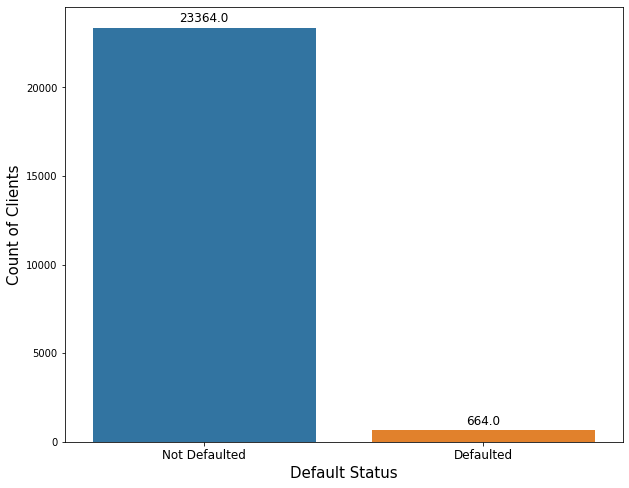

In [28]:
#Using Seaborn Countplot to check for the Distribution of the Target Variable
plt.figure(figsize=(10,8))
seaborn_plot=sns.countplot(x="Target_Default_Status", data=df)
plt.xlabel("Default Status", fontsize=15)
plt.ylabel("Count of Clients",fontsize=15)
plt.xticks([0,1], ['Not Defaulted', 'Defaulted'],fontsize=12)

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

From the above it can be seen that the distribution is extremely Imbalanced
 - Total number of data points belonging to Class 0 (when the client has NOT defaulted): <b>23364</b>
 - Total number of data points belonging to Class 1 (when the client has defaulted): <b>664</b>


##Exploring the Relationship between Demographic features (like Job Type, Sex, Education, Marriage Status, Age group) and Target Variable
***

###Exploring Relationship Between: Occupation Type and Target Variable


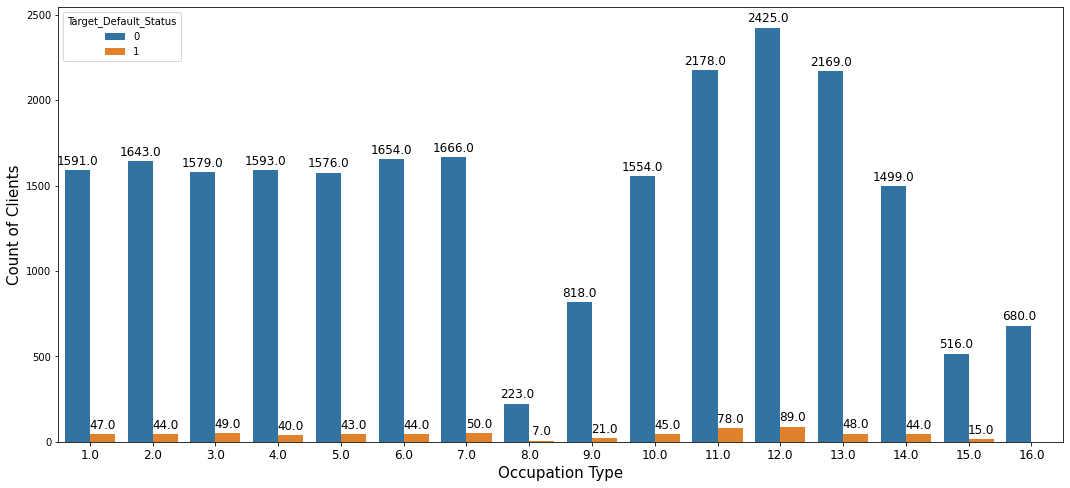

In [29]:
#Visualizing the default status with respect to the "Job Type" feature column
plt.figure(figsize=(18,8))
seaborn_plot=sns.countplot(x="JOB_TYPE", data=df, hue="Target_Default_Status")
plt.xlabel("Occupation Type", fontsize=15)
plt.ylabel("Count of Clients",fontsize=15)
plt.xticks(fontsize=12)

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

Percentage of Clients who defaulted across each Occupation type

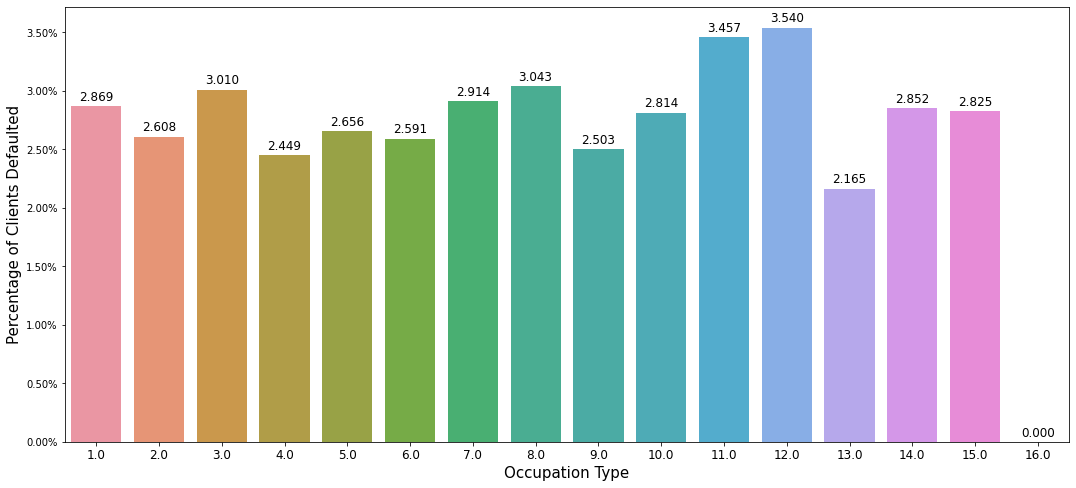

In [30]:
#Visualizing the Percentage of Clients who defaulted across each Occupation type
plt.figure(figsize=(18,8))
seaborn_plot=sns.barplot(x="JOB_TYPE", data=df, y="Target_Default_Status",ci=None)
plt.xlabel("Occupation Type", fontsize=15)
plt.ylabel("Percentage of Clients Defaulted",fontsize=15)
plt.xticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height()*100, '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

From the above plot it can be seen:
- The Job types '3', '8', '11' and '12' have the highest Default rate
- The remaining job types have comparable default rate


###Exploring Relationship Between: Sex and Target Variable


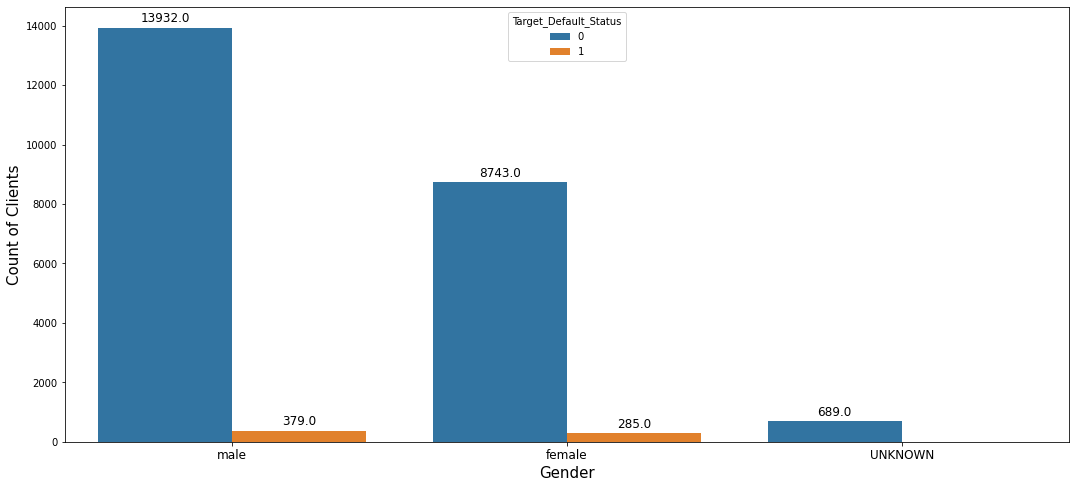

In [31]:
#Visualizing the default status with respect to the "SEX" feature column
plt.figure(figsize=(18,8))
seaborn_plot=sns.countplot(x="SEX", data=df, hue="Target_Default_Status")
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count of Clients",fontsize=15)
plt.xticks(fontsize=12)

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

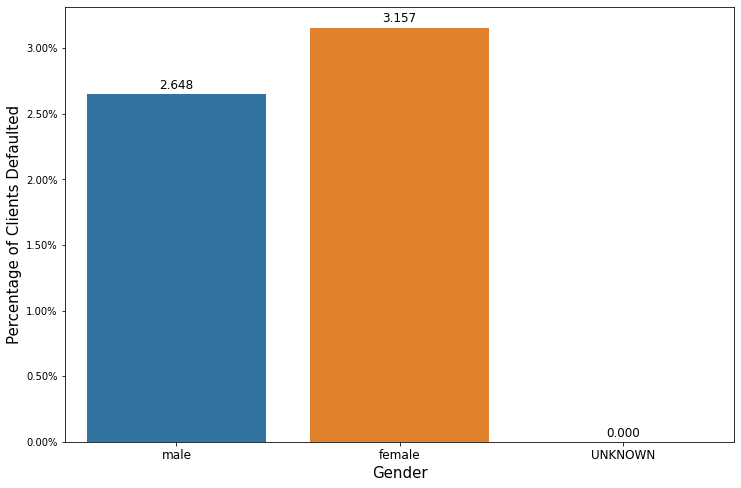

In [32]:
#Visualizing the Percentage of Clients who defaulted across each SEX type
plt.figure(figsize=(12,8))
seaborn_plot=sns.barplot(x="SEX", data=df, y="Target_Default_Status",ci=None)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Percentage of Clients Defaulted",fontsize=15)
plt.xticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height()*100, '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

Insights:
- From the above graphs we can see that although the Number of Male clients defaulters is more than the Number of Female client defaulters

- But in terms of percentage, the percentage of Female Clients defaulting is more than the percentage of Male clients defualting

In [33]:
df.columns

Index(['ID', 'LIMIT_BAL', 'JOB_TYPE', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Target_Default_Status'],
      dtype='object')

###Exploring Relationship Between: Education and Target Variable


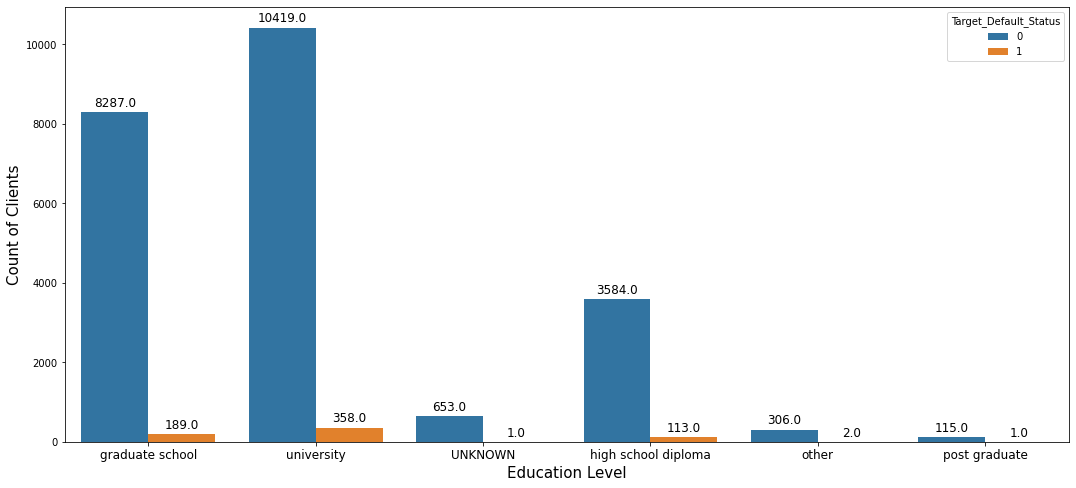

In [34]:
#Visualizing the default status with respect to the "EDUCATION" feature column
plt.figure(figsize=(18,8))
seaborn_plot=sns.countplot(x="EDUCATION", data=df, hue="Target_Default_Status")
plt.xlabel("Education Level", fontsize=15)
plt.ylabel("Count of Clients",fontsize=15)
plt.xticks(fontsize=12)

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

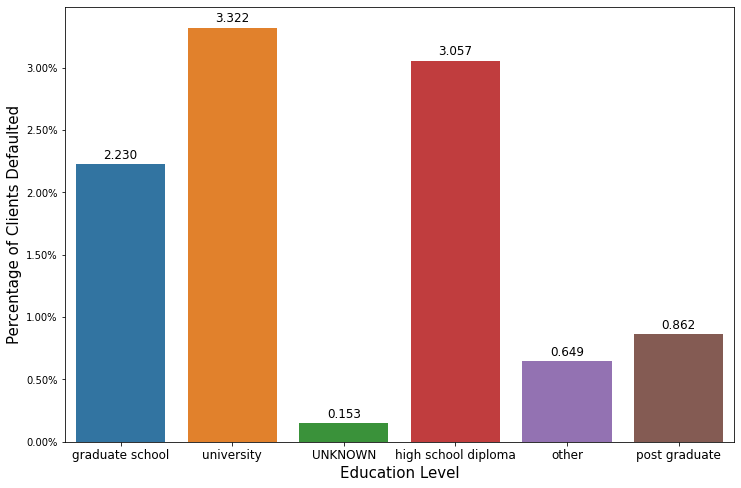

In [35]:
#Visualizing the Percentage of Clients who defaulted across each EDUCATION type
plt.figure(figsize=(12,8))
seaborn_plot=sns.barplot(x="EDUCATION", data=df, y="Target_Default_Status",ci=None)
plt.xlabel("Education Level", fontsize=15)
plt.ylabel("Percentage of Clients Defaulted",fontsize=15)
plt.xticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height()*100, '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

Insights:
- From the above graphs we can see that  clients with Higher Graduate Level or Post Grauate level education have LOWER chances of defauting 

- The level of education of clients placed in the "other" class, is unknown, their education level could be higher than the Graduate level (there by following the trend of lower default rate because oof higher education) or reverse there education level could be even lower than high school diploma

- Clients with Unviersity level education have the highest default rate

In [36]:
df.columns

Index(['ID', 'LIMIT_BAL', 'JOB_TYPE', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Target_Default_Status'],
      dtype='object')

###Exploring Relationship Between: Marriage and Target Variable


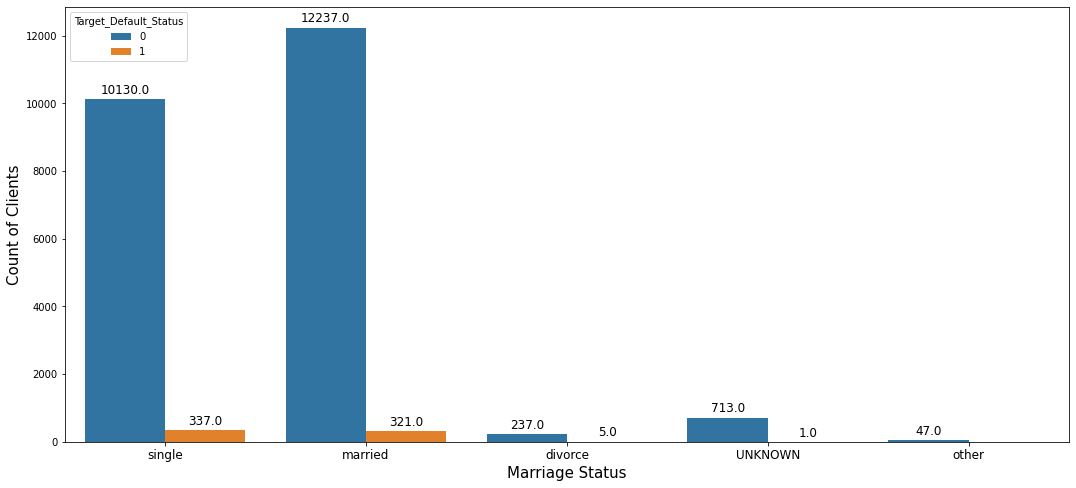

In [37]:
#Visualizing the default status with respect to the "MARRIAGE" feature column
plt.figure(figsize=(18,8))
seaborn_plot=sns.countplot(x="MARRIAGE", data=df, hue="Target_Default_Status")
plt.xlabel("Marriage Status", fontsize=15)
plt.ylabel("Count of Clients",fontsize=15)
plt.xticks(fontsize=12)

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

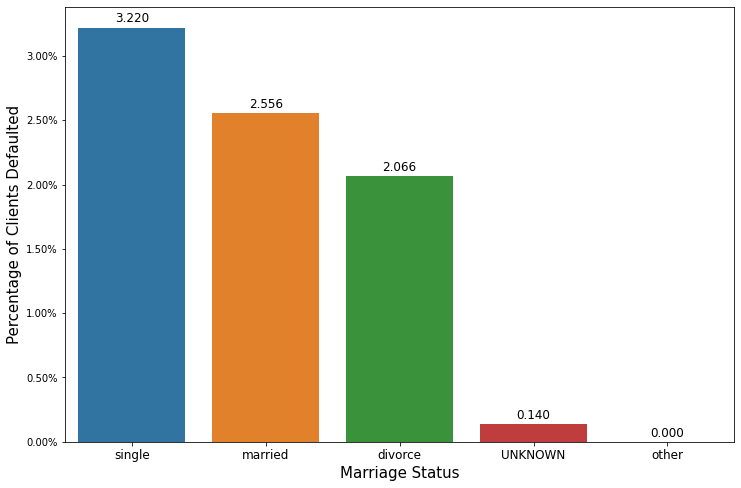

In [38]:
#Visualizing the Percentage of Clients who defaulted across each MARRIAGE type
plt.figure(figsize=(12,8))
seaborn_plot=sns.barplot(x="MARRIAGE", data=df, y="Target_Default_Status",ci=None)
plt.xlabel("Marriage Status", fontsize=15)
plt.ylabel("Percentage of Clients Defaulted",fontsize=15)
plt.xticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height()*100, '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

Insights:
- From the above graphs we can see that  Single clients have the highest chances of Default followed by Married and then by Divorce

###Exploring Relationship Between: Sex, Marriage combined with the Target Variable


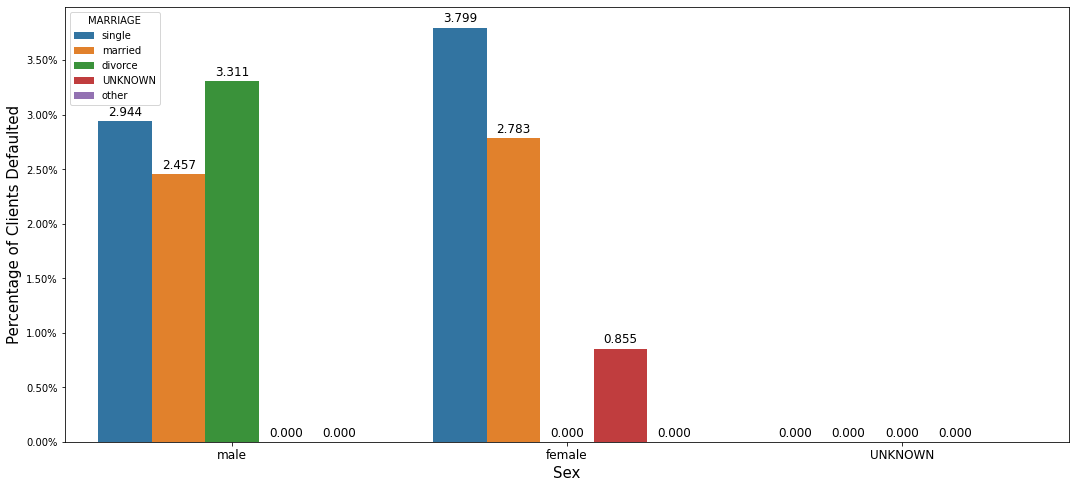

In [39]:

plt.figure(figsize=(18,8))
seaborn_plot=sns.barplot(x="SEX", y="Target_Default_Status", data=df, hue="MARRIAGE",ci=None)
plt.ylabel("Percentage of Clients Defaulted",fontsize=15)
plt.xlabel("Sex",
           fontsize=15)
plt.xticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height()*100, '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

Insights:
- From the above graphs we can see that Divorced Female Clients have the LOWEST probabilty of Defualt in contrast to Divorced Male hwo have the HIGHEST probabilty of Default

- In case of Female clients the Single Female has the highest probability of Default 

- In both the cases Married clients either Male or Female, have the LOWEST probability of Default

- In both the cases 'Other' labeled clients either Male or Female, have 0 probability of Default

###Exploring Relationship Between: Sex, Education combined with the Target Variable


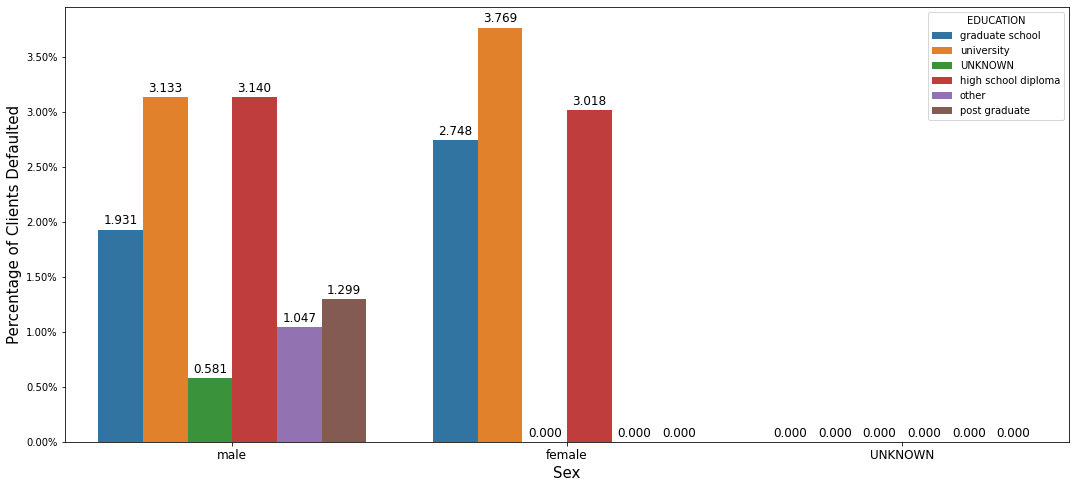

In [40]:
plt.figure(figsize=(18,8))
seaborn_plot=sns.barplot(x="SEX", y="Target_Default_Status", data=df, hue="EDUCATION",ci=None)
plt.ylabel("Percentage of Clients Defaulted",fontsize=15)
plt.xlabel("Sex",
           fontsize=15)
plt.xticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height()*100, '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

Insights:

- In both the cases Higher Grduate education clients either Male or Female, have LOWER probability of Default (with the exception of clients marked as 'Other')

- In both the cases Univeristy and High schol education level clients either Male or Female, have the HIGHEST probability of Default

- Female clients in the 'Post Graduate' and 'other'category have 0 probabilty of defaulting


###Exploring Relationship Between: AGE with the Target Variable


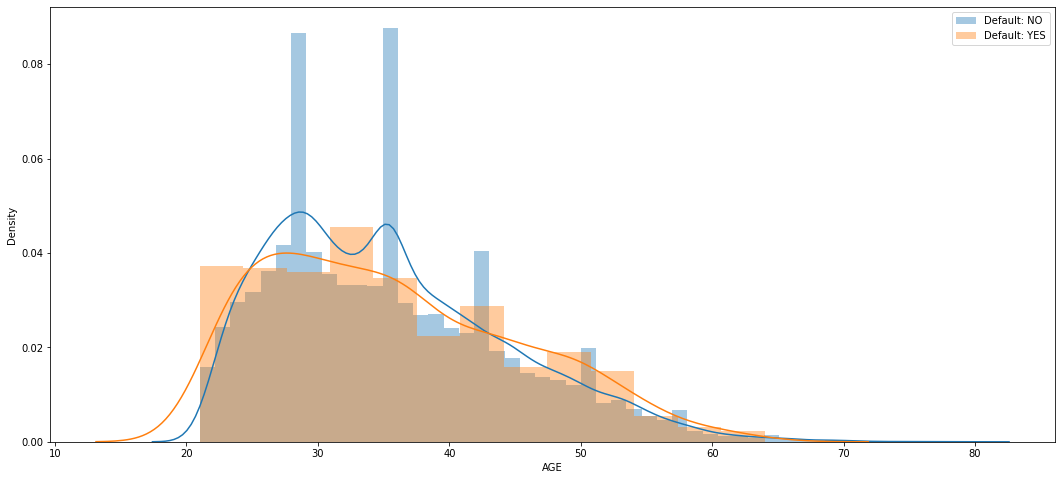

In [41]:
plt.figure(figsize=(18,8))

sns.distplot(df.loc[(df['Target_Default_Status'] == 0), 'AGE'], label = 'Default: NO')
sns.distplot(df.loc[(df['Target_Default_Status'] == 1), 'AGE'], label = 'Default: YES')
plt.legend()
plt.show()

Let us divide our dataset into bins and check the number of people defaulted in each Age Group Category

In [42]:
df['Age_Group_Bins'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
df['Age_Group_Bins'].value_counts()

(25, 30]    5684
(30, 35]    4639
(40, 50]    4608
(35, 40]    4534
(20, 25]    2861
(50, 60]    1507
(60, 80]     195
Name: Age_Group_Bins, dtype: int64

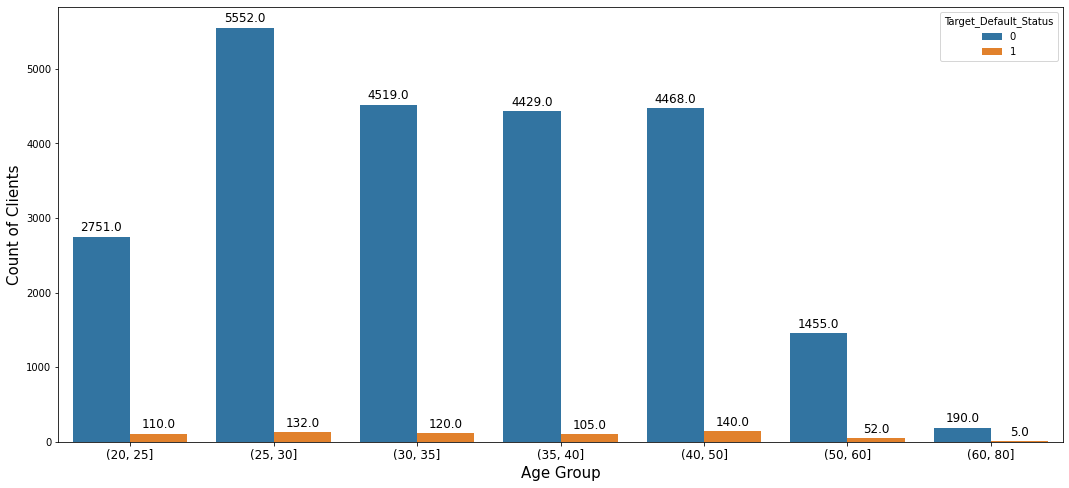

In [43]:
plt.figure(figsize=(18,8))
df['Age_Group_Bins'] = df['Age_Group_Bins'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']
seaborn_plot=sns.countplot(x="Age_Group_Bins", data=df, hue="Target_Default_Status", order=AgeBin_order)
plt.xlabel("Age Group", fontsize=15)
plt.ylabel("Count of Clients",fontsize=15)
plt.xticks(fontsize=12)

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

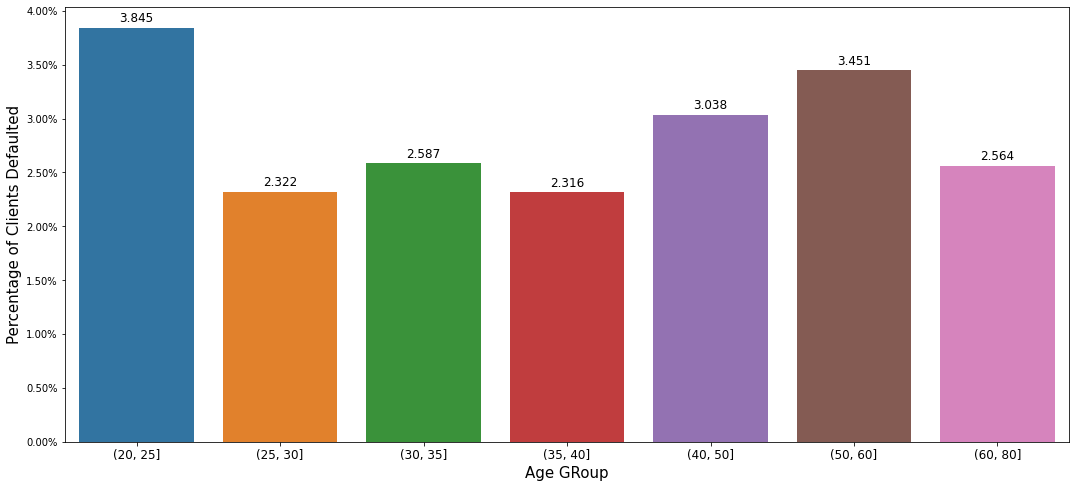

In [44]:
plt.figure(figsize=(18,8))
seaborn_plot=sns.barplot(x="Age_Group_Bins", y="Target_Default_Status", data=df,ci=None, order=AgeBin_order)
plt.ylabel("Percentage of Clients Defaulted",fontsize=15)
plt.xlabel("Age GRoup",
           fontsize=15)
plt.xticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Annonating the plot
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height()*100, '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=12)

Insights:

- The LOWEST probabiltiy of default is the for the age group 25-30
- The HIGHEST probability for Default is for the age group 20-25 and 50-60

### Exploring Relationship Between: Balance Limit with the Target Variable


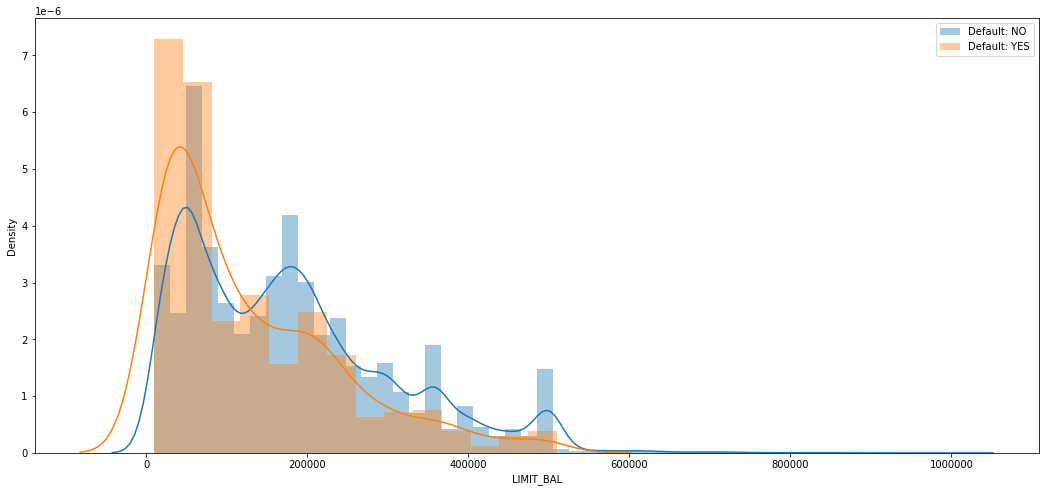

In [45]:
plt.figure(figsize=(18,8))

sns.distplot(df.loc[(df['Target_Default_Status'] == 0), 'LIMIT_BAL'], label = 'Default: NO',kde=True)
sns.distplot(df.loc[(df['Target_Default_Status'] == 1), 'LIMIT_BAL'], label = 'Default: YES',kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

Insight:
- Most of the Clients have 200000 or less of credit limit
- Most of the Clients who default had taken credit of less than 200000
- Higher the credit limit Lower the chance of Default

### Exploring Relationship Between: Repayment Status with the Target Variable


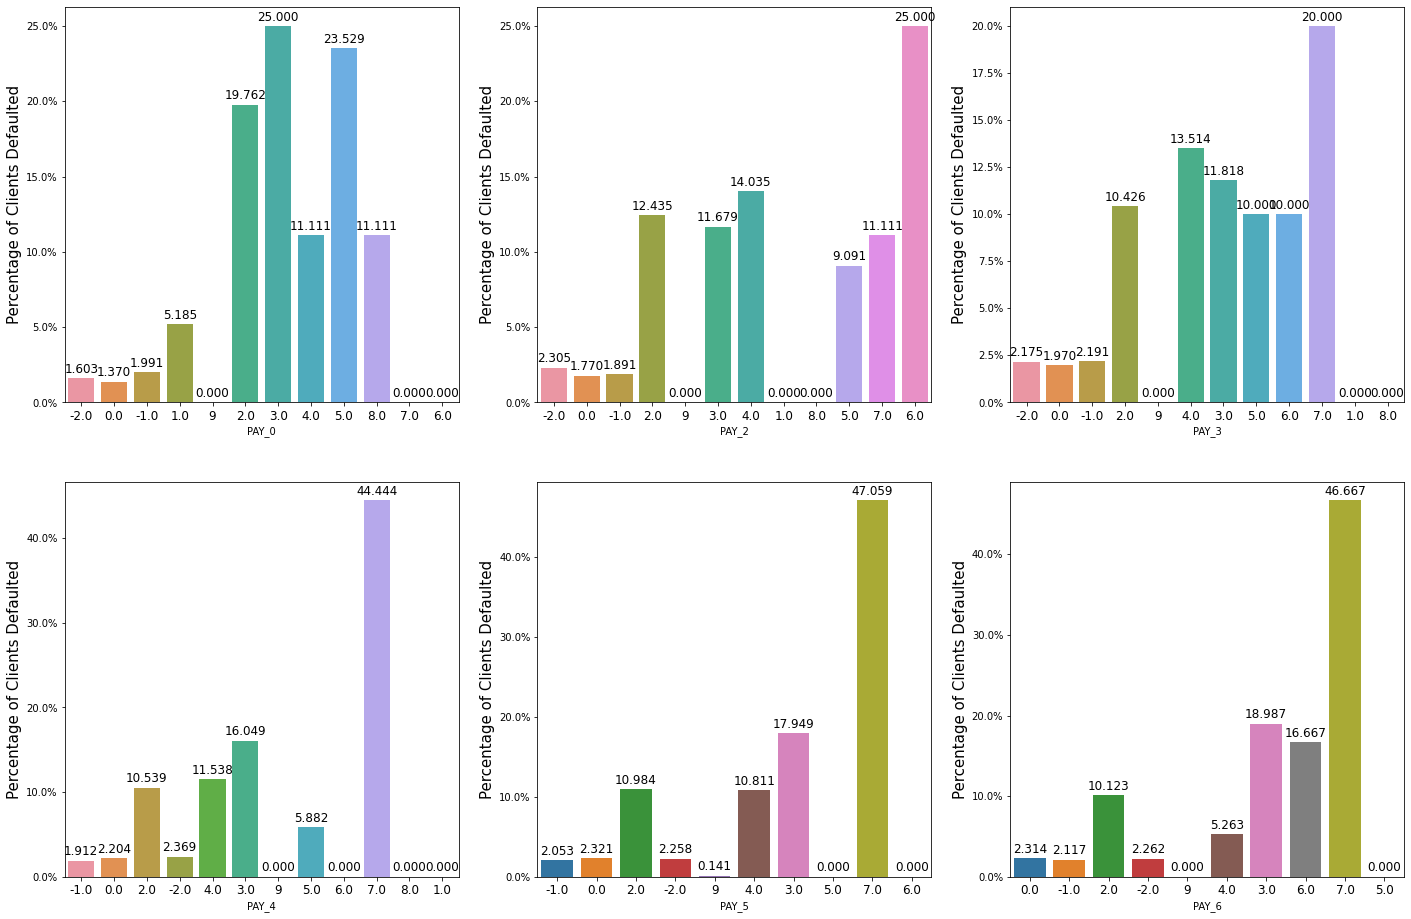

In [46]:
plt.figure(figsize=(24,16))

repayemt_feature_list = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for i,j in enumerate(repayemt_feature_list):    
    plt.subplot(2,3,i + 1)
    seaborn_plot=sns.barplot(x=j, y="Target_Default_Status", data=df,ci=None)
    plt.ylabel("Percentage of Clients Defaulted",fontsize=15)
    plt.xticks(fontsize=12)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

    #Annonating the plot
    for p in seaborn_plot.patches:
        seaborn_plot.annotate(format(p.get_height()*100, '.3f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points',fontsize=12)

Insight:
- Although most of the cutomers are ayng the credit loan back but the probability of default increase with the increase in number of payment delays

### Exploring Relationship Between: Bill Amount with the Target Variable


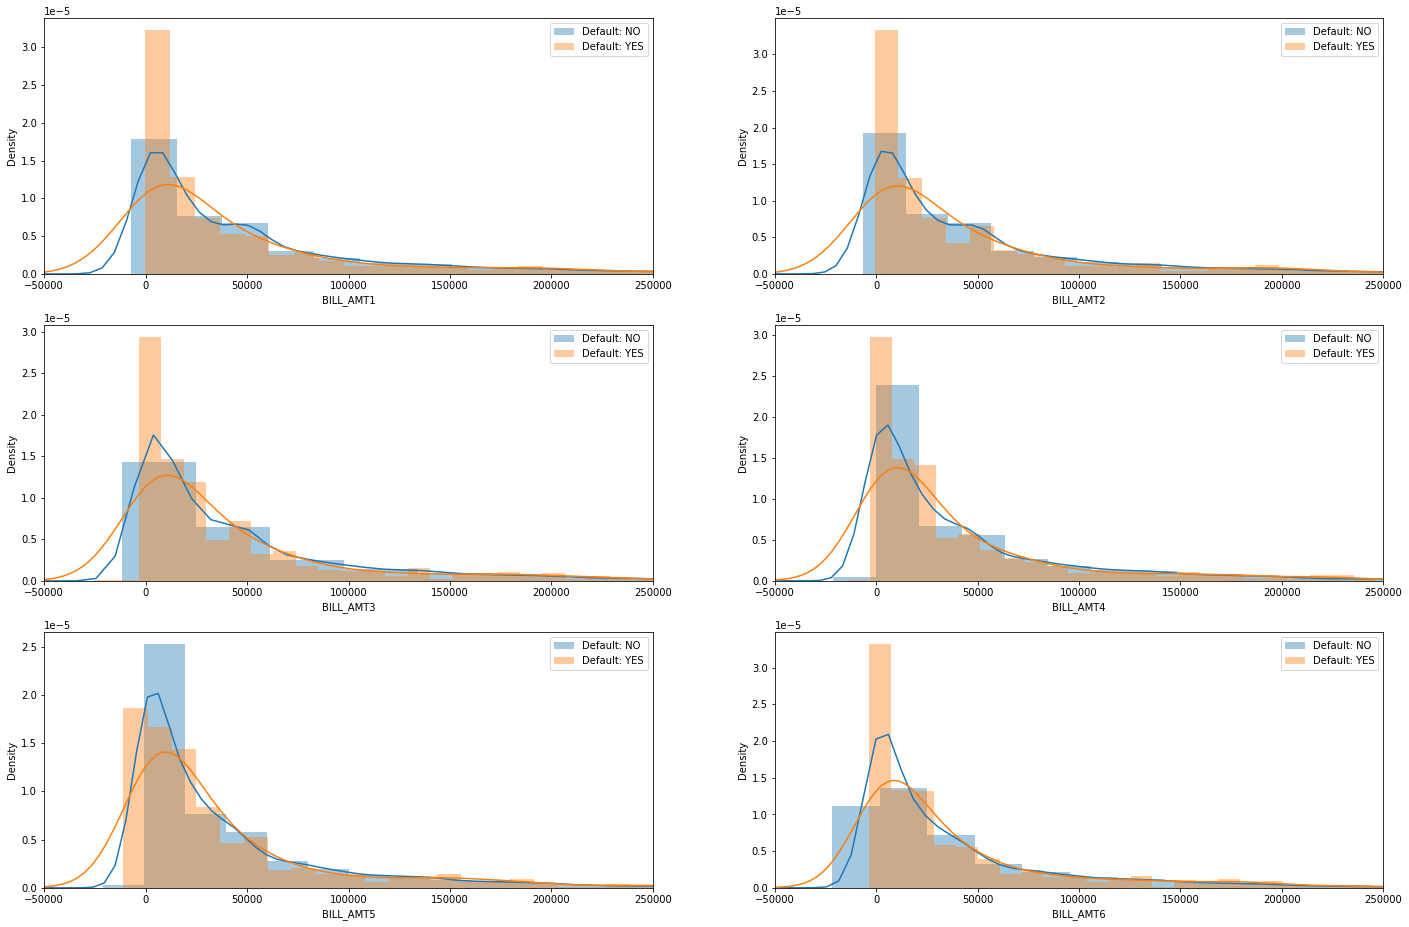

In [47]:
plt.figure(figsize=(24,16))

billamount_feature_list = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for i,j in enumerate(billamount_feature_list):    
    plt.subplot(3,2,i + 1)    
    sns.distplot(df.loc[(df['Target_Default_Status'] == 0), j], label = 'Default: NO')
    sns.distplot(df.loc[(df['Target_Default_Status'] == 1), j], label = 'Default: YES')
    plt.legend()
    plt.xlim(-50000,250000)



plt.show()

Insights:
- Clients with Negative Bill Statement have LOW probability of default
- Higher chance of Default if the client had a bill statement of 0 in the previous month

### Exploring Relationship Between: Amount of Previous Payment  with the Target Variable


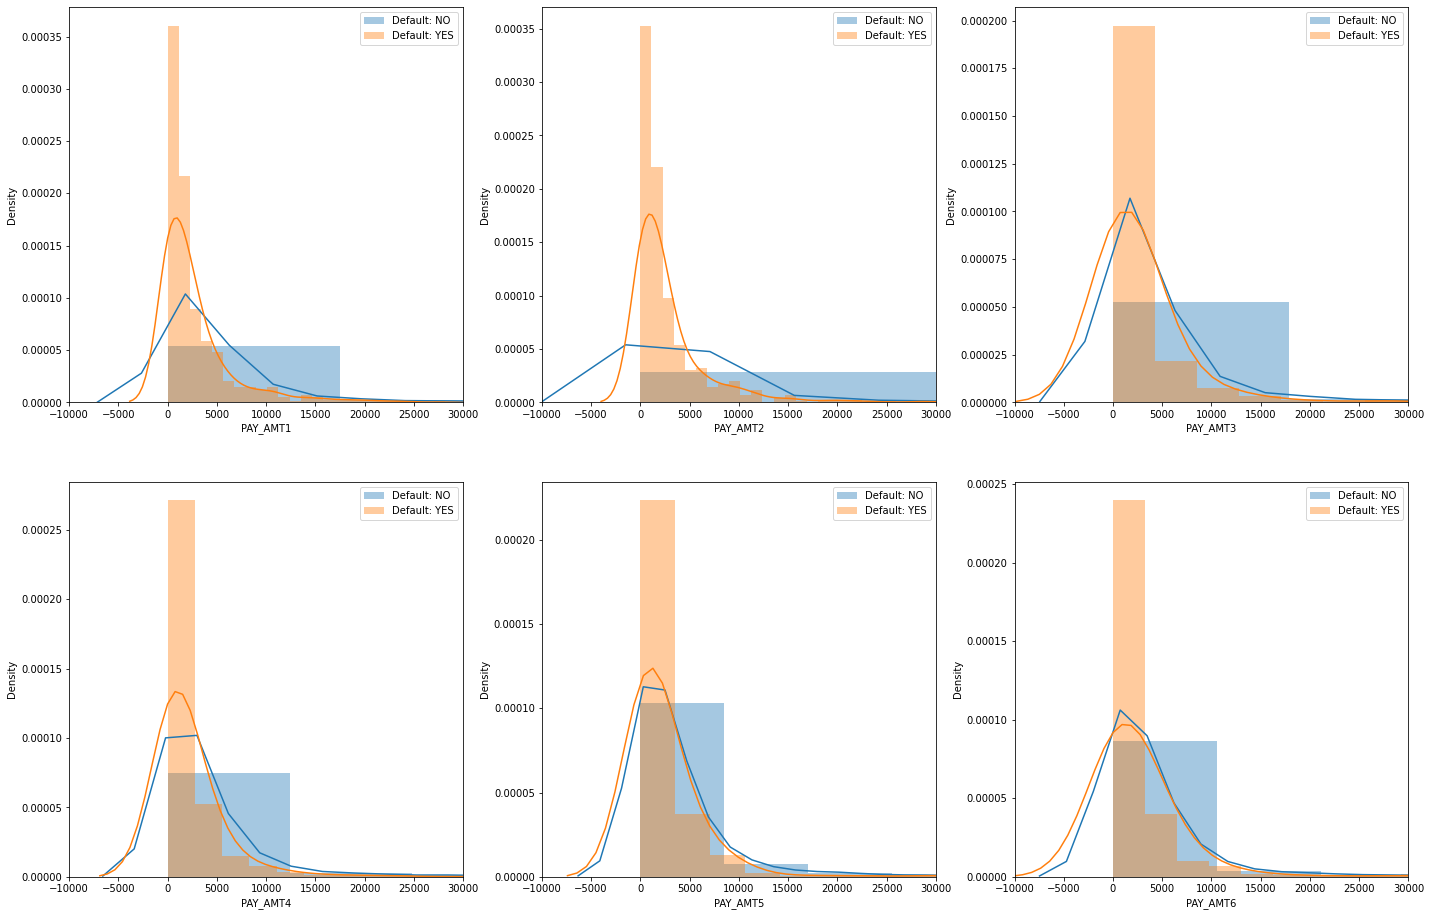

In [48]:
plt.figure(figsize=(24,16))

APP_feature_list = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for i,j in enumerate(APP_feature_list):    
    plt.subplot(2,3,i + 1)    
    sns.distplot(df.loc[(df['Target_Default_Status'] == 0), j], label = 'Default: NO')
    sns.distplot(df.loc[(df['Target_Default_Status'] == 1), j], label = 'Default: YES')
    plt.legend()
    plt.xlim(-10000,30000)



plt.show()

Insights:
- Clients who did not Pay anything in the previous months have HIGHER default rate
- Clients who have paid more than 5000 have LOWER default rates

In [49]:
#Dropping th Age_Group_Bins column
df = df.drop('Age_Group_Bins', axis=1)

##Encoding Categorical Features

- Here I am using one-hot encoding to encode categorical features like 'SEX','EDUCATION','MARRIAGE'.


In [50]:
df['PAY_0'] = df['PAY_0'].astype(float)
df['PAY_2'] = df['PAY_2'].astype(float)
df['PAY_3'] = df['PAY_3'].astype(float)
df['PAY_4'] = df['PAY_4'].astype(float)
df['PAY_5'] = df['PAY_5'].astype(float)
df['PAY_6'] = df['PAY_6'].astype(float)

In [51]:
dummies = pd.get_dummies(df[['SEX','EDUCATION','MARRIAGE']], drop_first=False)

In [52]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24028 entries, 0 to 24027
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   SEX_UNKNOWN                    24028 non-null  uint8
 1   SEX_female                     24028 non-null  uint8
 2   SEX_male                       24028 non-null  uint8
 3   EDUCATION_UNKNOWN              24028 non-null  uint8
 4   EDUCATION_graduate school      24028 non-null  uint8
 5   EDUCATION_high school diploma  24028 non-null  uint8
 6   EDUCATION_other                24028 non-null  uint8
 7   EDUCATION_post graduate        24028 non-null  uint8
 8   EDUCATION_university           24028 non-null  uint8
 9   MARRIAGE_UNKNOWN               24028 non-null  uint8
 10  MARRIAGE_divorce               24028 non-null  uint8
 11  MARRIAGE_married               24028 non-null  uint8
 12  MARRIAGE_other                 24028 non-null  uint8
 13  MARRIAGE_single 

In [53]:
#dropping original columns
df = df.drop(columns=['SEX','EDUCATION','MARRIAGE'], axis=1)

In [54]:
#Appending the dummies back
df = pd.concat([df, dummies],axis=1)

## Scaling the Numerical Features

- Here I am using StandardScaler to encode scale the Numerical features like 


In [55]:
from sklearn.preprocessing import StandardScaler

df2=df.copy()
ss=StandardScaler()
df_scaled = ss.fit_transform(df2[['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

df_scaled = pd.DataFrame(df_scaled, columns=['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [56]:
#dropping original columns
df = df.drop(columns=['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)

In [57]:
#Appending the df_scaled
df = pd.concat([df, df_scaled],axis=1)

In [58]:
#Reordering the columns
df = df[['ID', 'LIMIT_BAL', 'JOB_TYPE',  'SEX_UNKNOWN', 'SEX_female', 'SEX_male', 'EDUCATION_UNKNOWN',
       'EDUCATION_graduate school', 'EDUCATION_high school diploma',
       'EDUCATION_other', 'EDUCATION_post graduate', 'EDUCATION_university',
       'MARRIAGE_UNKNOWN', 'MARRIAGE_divorce', 'MARRIAGE_married',
       'MARRIAGE_other', 'MARRIAGE_single', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Target_Default_Status',
     ]]

In [59]:
#dropping the ID column
df = df.drop(columns=['ID'], axis=1)

In [60]:
#saving file to csv formt
df.to_csv("clean_dataset.csv",index=False)

In [63]:
#Saving the Notebook as HTML file
%%shell
jupyter nbconvert --to html /content/TD_Data_Cleaning_and_EDA.ipynb

[NbConvertApp] Converting notebook /content/TD_Data_Cleaning_and_EDA.ipynb to html
[NbConvertApp] Writing 1269120 bytes to /content/TD_Data_Cleaning_and_EDA.html
